In [17]:
import pandas as pd
import numpy  as np
import matplotlib as plt
import random

In [18]:
df1 = pd.read_csv('./datasets/dataset_02_11.csv', sep=',')
df1 = df1[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','occupancy','input_size','duration','block_x']]
df1 = df1.select_dtypes(exclude=['object'])

In [19]:
def calculate_mape(actual, predicted) -> float:
  
  # Convert actual and predicted
  # to numpy array data type if not already
  if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
    actual, predicted = np.array(actual), np.array(predicted)

  # Calculate the MAPE value and return
  return round(np.mean(np.abs((
    actual - predicted) / actual)) * 100, 2)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

#regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
regressor = RandomForestRegressor(n_estimators = 200, random_state =42, max_depth=20, max_features=12)
print('Random Forest Regressor')
for idApp in range(1,10):
  idApp = float(idApp)
  
  X_train = df1[df1['AppId'] != idApp]
  Y_train = df1[df1['AppId'] != idApp]['duration']
  X_test = df1[df1['AppId'] == idApp]
  Y_test = df1[df1['AppId'] == idApp]['duration']
  
  yTrain = np.log(Y_train + 0.1)
  yTest = np.log(Y_test + 0.1)
  xTrain = np.log(X_train + 0.1)
  xTest = np.log(X_test + 0.1)
  
  regressor.fit(xTrain, yTrain)

  y_pred = regressor.predict(xTest)
  print('Application: ',idApp, 'Percentage: ', calculate_mape(yTest, y_pred), '%')


Random Forest Regressor
Application:  1.0 Percentage:  6.47 %
Application:  2.0 Percentage:  1.15 %
Application:  3.0 Percentage:  0.56 %
Application:  4.0 Percentage:  31.71 %
Application:  5.0 Percentage:  0.08 %
Application:  6.0 Percentage:  0.0 %
Application:  7.0 Percentage:  0.02 %
Application:  8.0 Percentage:  0.01 %
Application:  9.0 Percentage:  0.32 %


c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


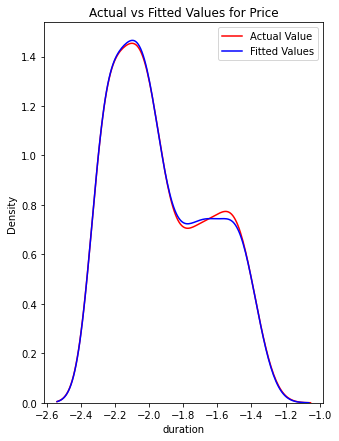

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(yTest, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values",ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.legend()


plt.show()
plt.close()